# Create/load identities list

In [1]:
import json

identities = {
    'gender/sexuality': [
        'woman', 'women',
        'man', 'men',
        'girl', 'girls', 'gal',
        'boy', 'boys',
        'mother', 'mum', 'mom', 'mama',
        'father', 'dad', 'papa',
        'trans', 'transgender',
        'queer',
        'gay',
        'lesbian',
        'bisexual',
    ],
    'age': [
        'children', 'kid', 'child',
        'young', 'youth',
        'old', 'elderly',
        'grandma', 'grandpa', 'grandfather', 'grandmother',
    ],
    'race/ethnicity/nationality': [
        'indian', 'indians',
        'asian', 'asians',
        'black', 'blacks',
        'white', 'whites',
        'american', 'americans',
        'african',
    ],
    'religion': [
        'christian', 'christians',
        'catholic', 'catholics',
        'muslim', 'muslims',
        'jew', 'jews',
    ],
    'class': [
        'rich', 
        'poor',
        'rural',
        'urban',
    ],
    'medical': [
        'immunocompromised',
        'diabetes',
        'heart disease',
    ]
}

In [3]:
# Save
outpath = '../identities.json'
with open(outpath, 'w') as f:
    json.dump(identities, f)

In [ ]:
import re

pats = {cat: [r'\b{}\b'.format(term) for term in identities[cat]] for cat in identities}
pats

# Search data for identity terms

In [10]:
from collections import Counter

identity_ctr = {}

In [11]:
from tqdm.notebook import tqdm
import re
import os

def process_tweet_dump(section):
    """ Extract text and tokenize a set of tweet dumps """
    
    results = Counter()
    dirpath = os.path.join('/home/huixiann/2022_socialbias_vaccine/', section)    
    # dirpath = os.path.join('/home/huixiann/2022_socialbias_vaccine/1_bycontinent', section)
    for fname in tqdm(os.listdir(dirpath)):
        if fname.startswith('.'):
            continue
        fpath = os.path.join(dirpath, fname)
        with open(fpath) as f:
            lines = f.read().splitlines()
            for line in lines:
                try:
                    tweet = json.loads(line)
                except ValueError:
                    continue
                text = tweet['text'].lower()
                for cat in pats:
                    for pat in pats[cat]:
                        if re.search(pat, text):
                            results[pat.replace('\\b', '')] += 1

In [16]:
# Search for terms
from multiprocessing import Pool

sections = ['0_anti-bot', '0_anti-human', '0_pro-bot', '0_pro-human']
pool = Pool(len(sections))
# pool = Pool(8)
# sections = sorted(os.listdir('/home/huixiann/2022_socialbias_vaccine/1_bycontinent/'))
# sections = ['others']

# list(tqdm(pool.imap(process_tweet_dump, sections), total=len(sections)))
list(map(process_tweet_dump, sections)) # for debugging
identity_ctr.keys()

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

dict_keys(['0_anti-bot', '0_anti-human', '0_pro-bot', '0_pro-human'])

In [ ]:
# Save out
import pickle

with open('identity_freqs

In [2]:
# Load identity freqs
import pickle
from collections import Counter

with open('identity_freqs.pkl', 'rb') as f:
    identity_ctr = pickle.load(f)
identity_ctr.keys()

dict_keys(['0_anti-bot', '0_anti-human', '0_pro-bot', '0_pro-human'])

0_anti-bot


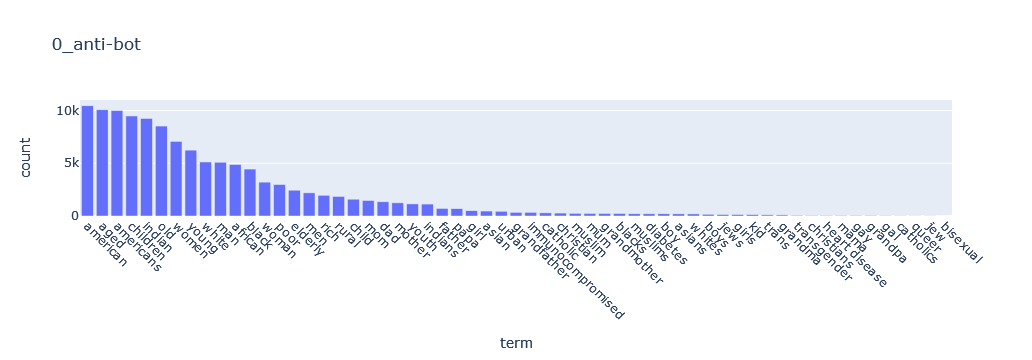

0_anti-human


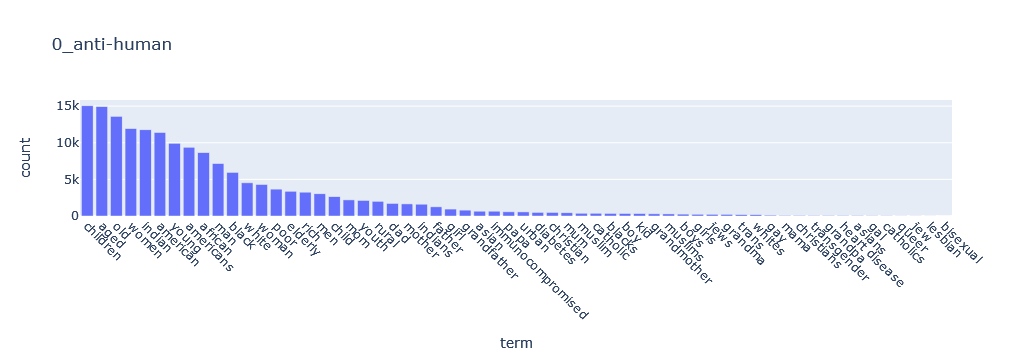

0_pro-bot


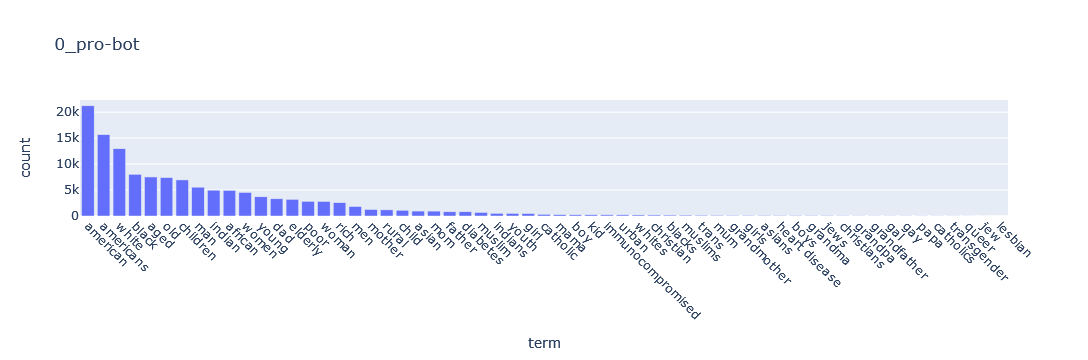

0_pro-human


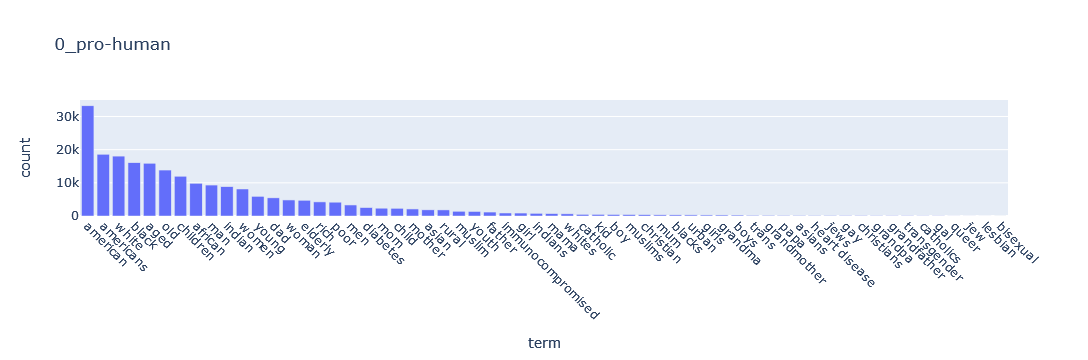

In [18]:
# Graph identity term frequencies
import plotly.express as px
import pandas as pd
from IPython.display import display

for cat in identity_ctr:
    print(cat)
    labels, freqs = list(zip(*identity_ctr[cat].most_common()))
    labels = [label.replace('\\b', '') for label in labels]
    data = pd.DataFrame()
    data['term'] = labels
    data['count'] = freqs
    # px.bar(x=labels, y=freqs).show()
    # display(data.head(10))
    fig = px.bar(data, x='term', y='count', title=cat)
    fig.update_xaxes(tickangle=45)
    fig.show()